<a href="https://colab.research.google.com/github/safriyamrn/EmotionAnalysis-NRCEmotionLexicon/blob/main/Analisis_Emosi_Luqman_Indonesia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Import Library
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk.corpus import stopwords
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from collections import Counter
from nltk.tokenize import word_tokenize

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open("/content/drive/MyDrive/Dataset Skripsi/id.indonesian.txt", "r", encoding="utf-8") as f:
    lines = f.readlines()

data = []
for line in lines:
    parts = line.strip().split("|")
    if len(parts) == 3:
        surah, ayat, teks = parts
        data.append([int(surah), int(ayat), teks])

df = pd.DataFrame(data, columns=["Surah", "Ayat", "Terjemahan"])

# untuk mengambil hanya Surah Luqman (Surah ke-31)
luqman = df[df["Surah"] == 31].reset_index(drop=True)
#simpan
luqman.to_csv("/content/luqman.csv", index=False)
luqman

,Surah,Ayat,Terjemahan
0,31,1,Alif Laam Miim
1,31,2,"Inilah ayat-ayat Al Quran yang mengandung hikmat,"
2,31,3,menjadi petunjuk dan rahmat bagi orang-orang y...
3,31,4,"(yaitu) orang-orang yang mendirikan shalat, me..."
4,31,5,Mereka itulah orang-orang yang tetap mendapat ...
5,31,6,Dan di antara manusia (ada) orang yang memperg...
6,31,7,Dan apabila dibacakan kepadanya ayat-ayat Kami...
7,31,8,Sesungguhnya orang-orang yang beriman dan meng...
8,31,9,Kekal mereka di dalamnya; sebagai janji Allah ...
9,31,10,Dia menciptakan langit tanpa tiang yang kamu m...


In [ ]:
# Download resource
nltk.download('punkt')
nltk.download('stopwords')

# Stopwords Bahasa Indonesia
stopwords_id = set(stopwords.words("indonesian"))

# Stemmer Bahasa Indonesia
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Kamus normalisasi
normalisasi_dict = {
    "alquran": "quran",
    "al-quran": "quran",
    "al-qur'an": "quran",
    "al qur’an": "quran",
    "al qur an": "quran",
    "sholat": "salat",
    "shalat": "salat",
    "dzikir": "zikir",
    "dzikr": "zikir",
    "du'a": "doa",
    "do’a": "doa",
    "adzab": "azab",
    "’adzab": "azab",
}

# Whitelist
whitelist_stopwords = {"tidak", "baik"}
whitelist_stem = {"quran", "allah", "islam", "muhammad", "rasulullah", "syirik", "tauhid"}

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nltk.download('punkt_tab')
def preprocess_text(text):
    # 1. Case folding
    text = text.lower()

    # 2. Normalisasi
    for k, v in normalisasi_dict.items():
        text = text.replace(k, v)

    # 3. Hilangkan tanda baca & angka
    text = re.sub(r"[^a-z\s]", " ", text)

    # 4. Tokenisasi
    tokens = word_tokenize(text)

    # 5. Stemming
    tokens_stemmed = [stemmer.stem(token) for token in tokens]

    # 6. Stopword removal + whitelist
    tokens_final = [
        token for token in tokens_stemmed
        if (token not in stopwords_id) or (token in whitelist_stopwords) or (token in whitelist_stem)
    ]

    return tokens_final
    # Terapkan preprocessing
luqman["Tokens"] = luqman["Terjemahan"].apply(preprocess_text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
luqman

,Surah,Ayat,Terjemahan,Tokens
0,31,1,Alif Laam Miim,"[alif, laam, miim]"
1,31,2,"Inilah ayat-ayat Al Quran yang mengandung hikmat,","[ayat, ayat, al, quran, kandung, hikmat]"
2,31,3,menjadi petunjuk dan rahmat bagi orang-orang y...,"[rahmat, orang, orang, baik]"
3,31,4,"(yaitu) orang-orang yang mendirikan shalat, me...","[orang, orang, salat, tunai, zakat, negeri, ak..."
4,31,5,Mereka itulah orang-orang yang tetap mendapat ...,"[orang, orang, tuhan, orang, orang, untung]"
5,31,6,Dan di antara manusia (ada) orang yang memperg...,"[manusia, orang, tidak, sesat, manusia, jalan,..."
6,31,7,Dan apabila dibacakan kepadanya ayat-ayat Kami...,"[baca, ayat, ayat, sombong, olah, olah, dengar..."
7,31,8,Sesungguhnya orang-orang yang beriman dan meng...,"[sungguh, orang, orang, iman, kerja, amal, ama..."
8,31,9,Kekal mereka di dalamnya; sebagai janji Allah ...,"[kekal, janji, allah, maha, perkasa, maha, bij..."
9,31,10,Dia menciptakan langit tanpa tiang yang kamu m...,"[cipta, langit, tiang, lihat, letak, gunung, g..."


In [ ]:
# Path file lexicon
LEX_PATH = "/content/drive/MyDrive/Dataset Skripsi/Indonesian-NRC-EmoLex.txt"

# Baca NRC EmoLex
nrc = pd.read_csv(LEX_PATH, sep='\t', engine='python')

# Deteksi kolom emosi
emotion_cols = [c for c in nrc.columns if c.lower() in
                ['anger','anticipation','disgust','fear','joy',
                 'negative','positive','sadness','surprise','trust']]

# Pakai kolom Indonesian Word agar cocok dgn token Bahasa Indonesia
ind_col = next(c for c in nrc.columns if 'indonesian' in c.lower())

# Rapikan
nrc_clean = nrc[[ind_col] + emotion_cols].copy()
nrc_clean[ind_col] = nrc_clean[ind_col].astype(str).str.lower().str.strip()

lexicon = {
    row[ind_col]: {e: int(row[e]) for e in emotion_cols}
    for _, row in nrc_clean.iterrows()
}


In [ ]:
records = []

for _, row in luqman.iterrows():
    tokens = row['Tokens']
    word_score = {}
    pos_count = neg_count = 0
    emo_counter = Counter()

    for tok in tokens:
        if tok in lexicon:
            # hitung semua emosi
            for emo in emotion_cols:
                if lexicon[tok][emo] == 1:
                    emo_counter[emo] += 1
            # hitung positive / negative
            pos_count += lexicon[tok]['positive']
            neg_count += lexicon[tok]['negative']
            # skor per kata = positive - negative
            word_score[tok] = lexicon[tok]['positive'] - lexicon[tok]['negative']
        else:
            word_score[tok] = 0

    # Label sentimen
    if pos_count > neg_count:
        sentiment = "Positive"
    elif neg_count > pos_count:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"

    records.append({
        "Ayat" : row['Ayat'],
        "Terjemahan": row['Terjemahan'],
        "Skor Sentimen per kata": word_score,
        "Positif": pos_count,
        "Negatif": neg_count,
        "Total": pos_count - neg_count,
        "Sentimen": sentiment,
        # Tambahkan 8 emosi
        **{emo: emo_counter[emo] for emo in
           ['anger','anticipation','disgust','fear','joy','sadness','surprise','trust']}
    })

result_df = pd.DataFrame(records)

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

# Lihat 10 baris pertama
display(result_df)

# Simpan ke CSV
result_df.to_csv("/content/luqman_sentiment_emotion_id.csv", index=False)
print("Hasil disimpan ke /content/luqman_sentiment_emotion_id.csv")


,Ayat,Terjemahan,Skor Sentimen per kata,Positif,Negatif,Total,Sentimen,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
0,1,Alif Laam Miim,"{'alif': 0, 'laam': 0, 'miim': 0}",0,0,0,Neutral,0,0,0,0,0,0,0,0
1,2,"Inilah ayat-ayat Al Quran yang mengandung hikmat,","{'ayat': 0, 'al': 0, 'quran': 0, 'kandung': 0, 'hikmat': 0}",0,0,0,Neutral,0,0,0,0,0,0,0,0
2,3,"menjadi petunjuk dan rahmat bagi orang-orang yang berbuat kebaikan,","{'rahmat': 1, 'orang': 0, 'baik': 1}",2,0,2,Positive,0,0,0,0,1,0,1,1
3,4,"(yaitu) orang-orang yang mendirikan shalat, menunaikan zakat dan mereka yakin akan adanya negeri akhirat.","{'orang': 0, 'salat': 0, 'tunai': 0, 'zakat': 0, 'negeri': 0, 'akhirat': 0}",0,0,0,Neutral,0,0,0,0,0,0,0,0
4,5,Mereka itulah orang-orang yang tetap mendapat petunjuk dari Tuhannya dan mereka itulah orang-orang yang beruntung.,"{'orang': 0, 'tuhan': 1, 'untung': 0}",1,0,1,Positive,0,1,0,1,1,0,0,1
5,6,Dan di antara manusia (ada) orang yang mempergunakan perkataan yang tidak berguna untuk menyesatkan (manusia) dari jalan Allah tanpa pengetahuan dan menjadikan jalan Allah itu olok-olokan. Mereka itu akan memperoleh azab yang menghinakan.,"{'manusia': 0, 'orang': 0, 'tidak': 0, 'sesat': -1, 'jalan': 0, 'allah': 0, 'olok': 0, 'azab': 0, 'hina': -1}",0,2,-2,Negative,1,0,2,0,0,0,0,0
6,7,"Dan apabila dibacakan kepadanya ayat-ayat Kami dia berpaling dengan menyombongkan diri seolah-olah dia belum mendengarnya, seakan-akan ada sumbat di kedua telinganya; maka beri kabar gembiralah dia dengan azab yang pedih.","{'baca': 0, 'ayat': 0, 'sombong': -1, 'olah': 0, 'dengar': 0, 'sumbat': 0, 'telinga': 0, 'kabar': 0, 'gembira': 1, 'azab': 0, 'pedih': 0}",1,1,0,Neutral,0,0,0,0,1,0,0,1
7,8,"Sesungguhnya orang-orang yang beriman dan mengerjakan amal-amal saleh, bagi mereka surga-surga yang penuh kenikmatan,","{'sungguh': 1, 'orang': 0, 'iman': 0, 'kerja': 0, 'amal': 1, 'saleh': 1, 'surga': 1, 'penuh': 1, 'nikmat': 0}",7,0,7,Positive,0,0,1,0,4,1,0,3
8,9,Kekal mereka di dalamnya; sebagai janji Allah yang benar. Dan Dialah Yang Maha Perkasa lagi Maha Bijaksana.,"{'kekal': 0, 'janji': 0, 'allah': 0, 'maha': 0, 'perkasa': 0, 'bijaksana': 1}",1,0,1,Positive,0,0,0,0,0,0,0,0
9,10,"Dia menciptakan langit tanpa tiang yang kamu melihatnya dan Dia meletakkan gunung-gunung (di permukaan) bumi supaya bumi itu tidak menggoyangkan kamu; dan memperkembang biakkan padanya segala macam jenis binatang. Dan Kami turunkan air hujan dari langit, lalu Kami tumbuhkan padanya segala macam tumbuh-tumbuhan yang baik.","{'cipta': 0, 'langit': 1, 'tiang': 0, 'lihat': 0, 'letak': 0, 'gunung': 0, 'muka': 0, 'bumi': 0, 'tidak': 0, 'goyang': 0, 'kembang': 0, 'biak': 0, 'jenis': 0, 'binatang': 0, 'turun': 0, 'air': 0, 'hujan': 0, 'tumbuh': 0, 'baik': 1}",3,0,3,Positive,0,2,0,0,0,1,0,1


Hasil disimpan ke /content/luqman_sentiment_emotion_id.csv


In [ ]:
emosi_only = ['anger','anticipation','disgust','fear',
              'joy','sadness','surprise','trust']

records_emosi = []

for _, row in luqman.iterrows():
    tokens = row['Tokens']
    emo_counter = Counter()
    per_word_score = {}

    for tok in tokens:
        if tok in lexicon:
            # ambil seluruh skor emosi kata ini
            word_scores = {emo: lexicon[tok][emo] for emo in emosi_only}
            per_word_score[tok] = word_scores

            # tambahkan ke counter total per ayat
            for emo, val in word_scores.items():
                if val == 1:
                    emo_counter[emo] += 1
        else:
            # kata tidak ada di lexicon -> semua emosi 0
            per_word_score[tok] = {emo:0 for emo in emosi_only}

    # emosi dominan per ayat
    dominant_emo = max(emo_counter, key=emo_counter.get) if emo_counter else "none"

    records_emosi.append({
        "Ayat"          : row["Ayat"],
        "Terjemahan"    : row["Terjemahan"],
        "Tokens"        : tokens,
        "Skor Emosi per Kata" : per_word_score,
        "Emosi Dominan" : dominant_emo,
        **{emo: emo_counter[emo] for emo in emosi_only}
    })

emosi_df = pd.DataFrame(records_emosi)

In [ ]:
pd.set_option('display.max_colwidth', None)
emosi_df[['Ayat','Terjemahan', 'Tokens','Skor Emosi per Kata', 'Emosi Dominan']]
emosi_df.to_csv("/content/luqman_emotion_id.csv", index=False)
emosi_df


,Ayat,Terjemahan,Tokens,Skor Emosi per Kata,Emosi Dominan,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
0,1,Alif Laam Miim,"[alif, laam, miim]","{'alif': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}, 'laam': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}, 'miim': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}}",none,0,0,0,0,0,0,0,0
1,2,"Inilah ayat-ayat Al Quran yang mengandung hikmat,","[ayat, ayat, al, quran, kandung, hikmat]","{'ayat': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}, 'al': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}, 'quran': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}, 'kandung': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}, 'hikmat': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}}",none,0,0,0,0,0,0,0,0
2,3,"menjadi petunjuk dan rahmat bagi orang-orang yang berbuat kebaikan,","[rahmat, orang, orang, baik]","{'rahmat': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 1, 'sadness': 0, 'surprise': 1, 'trust': 0}, 'orang': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}, 'baik': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 1}}",joy,0,0,0,0,1,0,1,1
3,4,"(yaitu) orang-orang yang mendirikan shalat, menunaikan zakat dan mereka yakin akan adanya negeri akhirat.","[orang, orang, salat, tunai, zakat, negeri, akhirat]","{'orang': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}, 'salat': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}, 'tunai': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}, 'zakat': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}, 'negeri': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}, 'akhirat': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}}",none,0,0,0,0,0,0,0,0
4,5,Mereka itulah orang-orang yang tetap mendapat petunjuk dari Tuhannya dan mereka itulah orang-orang yang beruntung.,"[orang, orang, tuhan, orang, orang, untung]","{'orang': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}, 'tuhan': {'anger': 0, 'anticipation': 1, 'disgust': 0, 'fear': 1, 'joy': 1, 'sadness': 0, 'surprise': 0, 'trust': 1}, 'untung': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}}",anticipation,0,1,0,1,1,0,0,1
5,6,Dan di antara manusia (ada) orang yang mempergunakan perkataan yang tidak berguna untuk menyesatkan (manusia) dari jalan Allah tanpa pengetahuan dan menjadikan jalan Allah itu olok-olokan. Mereka itu akan memperoleh azab yang menghinakan.,"[manusia, orang, tidak, sesat, manusia, jalan, allah, jalan, allah, olok, olok, azab, hina]","{'manusia': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}, 'orang': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}, 'tidak': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}, 'sesat': {'anger': 0, 'anticipation': 0, 'disgust': 1, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}, 'jalan'

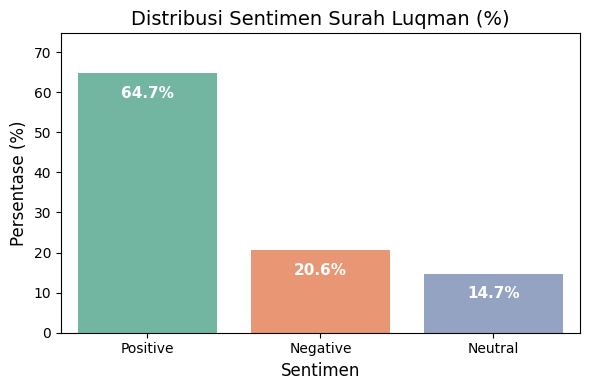

In [ ]:
sent_pct = result_df['Sentimen'].value_counts(normalize=True) * 100
sent_df  = sent_pct.reset_index()
sent_df.columns = ['Sentimen','Persentase']

plt.figure(figsize=(6,4))
sns.barplot(
    data=sent_df,
    x='Sentimen',
    y='Persentase',
    hue='Sentimen',
    palette='Set2',
    legend=False
)

plt.title("Distribusi Sentimen Surah Luqman (%)", fontsize=14)
plt.xlabel("Sentimen", fontsize=12)
plt.ylabel("Persentase (%)", fontsize=12)

plt.ylim(0, sent_df['Persentase'].max() + 10)
for i, v in enumerate(sent_df['Persentase']):
    plt.text(i, v - 5, f"{v:.1f}%", ha='center', va='center', color='white', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


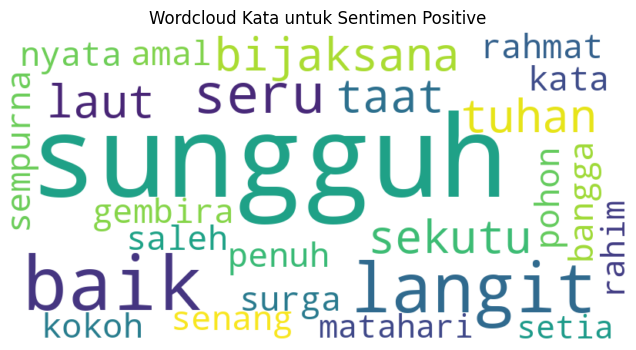

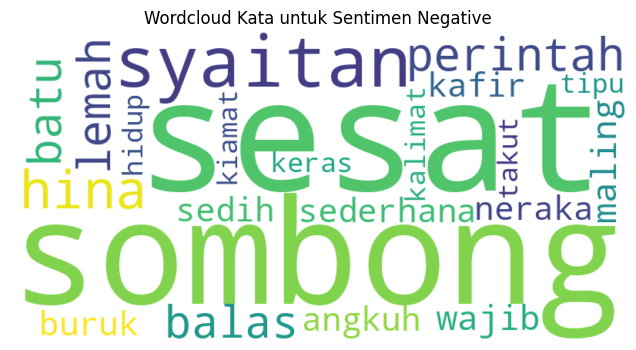

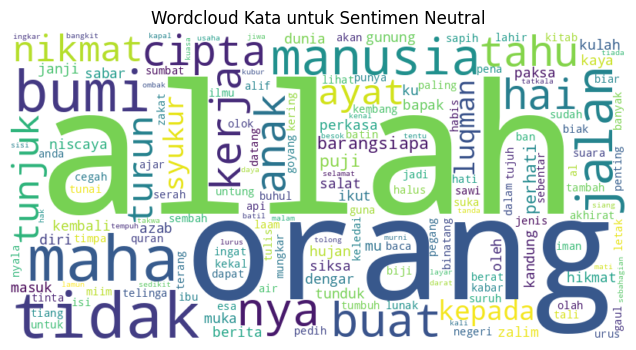

In [ ]:
from collections import Counter

wordcount_sentimen = {"Positive": Counter(), "Negative": Counter(), "Neutral": Counter()}

for _, row in result_df.iterrows():
    sentiment = row['Sentimen']
    for word, score in row['Skor Sentimen per kata'].items():
        if score > 0:
            wordcount_sentimen["Positive"][word] += 1
        elif score < 0:
            wordcount_sentimen["Negative"][word] += 1
        else:
            wordcount_sentimen["Neutral"][word] += 1

# Generate word clouds for each sentiment
for sentiment, word_counts in wordcount_sentimen.items():
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="white",
        collocations=False
    ).generate_from_frequencies(word_counts)

    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Wordcloud Kata untuk Sentimen {sentiment}")
    plt.show()

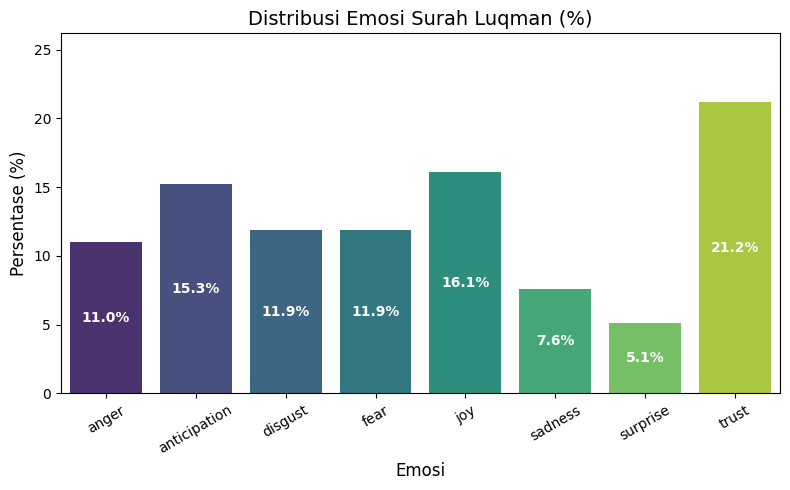

In [ ]:
# Ambil hanya 8 emosi
emosi_only = ['anger','anticipation','disgust','fear',
              'joy','sadness','surprise','trust']


total_emosi = result_df[emosi_only].sum()
persentase_emosi = total_emosi / total_emosi.sum() * 100
emosi_df = persentase_emosi.reset_index()
emosi_df.columns = ['Emosi', 'Persentase']

plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=emosi_df,
    x='Emosi',
    y='Persentase',
    hue='Emosi',
    palette='viridis',
    legend=False
)
plt.ylim(0, emosi_df['Persentase'].max() + 5)
for i, v in enumerate(emosi_df['Persentase']):
    ax.text(i, v/2, f"{v:.1f}%", ha='center', va='center',
            color='white', fontsize=10, fontweight='bold')

plt.title("Distribusi Emosi Surah Luqman (%)", fontsize=14)
plt.xlabel("Emosi", fontsize=12)
plt.ylabel("Persentase (%)", fontsize=12)
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()


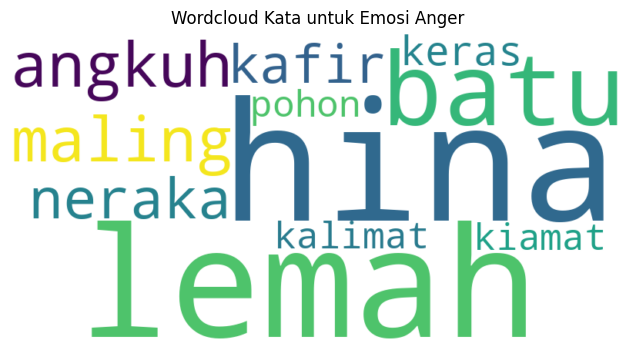

In [ ]:
from collections import Counter

wordcount_emosi = {}
for e in ['anger','anticipation','disgust','fear','joy','sadness','surprise','trust']:
    words = []
    for _, row in result_df.iterrows():
        for w, val in row['Skor Sentimen per kata'].items():
            if w in lexicon and lexicon[w].get(e,0) == 1:
                words.append(w)
    wordcount_emosi[e] = Counter(words)

for emo in ["anger"]:
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="white",
        # warna merah untuk emosi marah
        collocations=False
    ).generate_from_frequencies(wordcount_emosi[emo])

    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Wordcloud Kata untuk Emosi {emo.capitalize()}")
    plt.show()


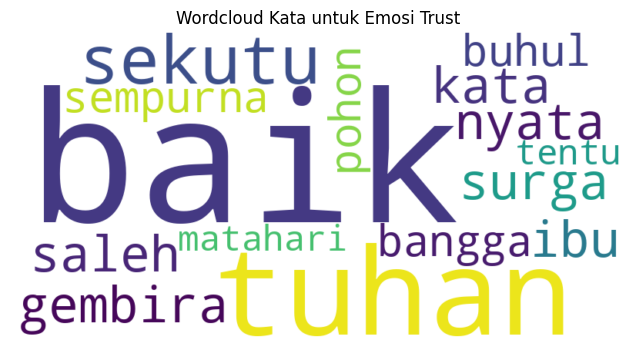

In [ ]:
for emo in ["trust"]:
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="white",
        # warna merah untuk emosi marah
        collocations=False
    ).generate_from_frequencies(wordcount_emosi[emo])

    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Wordcloud Kata untuk Emosi {emo.capitalize()}")
    plt.show()

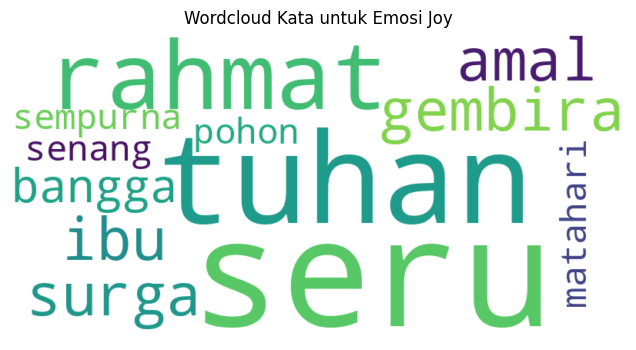

In [ ]:
for emo in ["joy"]:
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="white",
        # warna merah untuk emosi marah
        collocations=False
    ).generate_from_frequencies(wordcount_emosi[emo])

    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Wordcloud Kata untuk Emosi {emo.capitalize()}")
    plt.show()

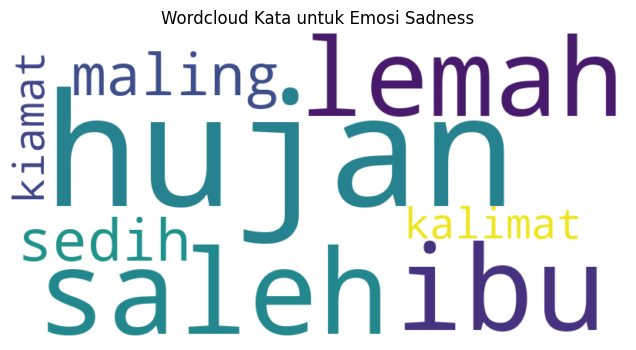

In [ ]:
for emo in ["sadness"]:
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="white",
        # warna merah untuk emosi marah
        collocations=False
    ).generate_from_frequencies(wordcount_emosi[emo])

    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Wordcloud Kata untuk Emosi {emo.capitalize()}")
    plt.show()

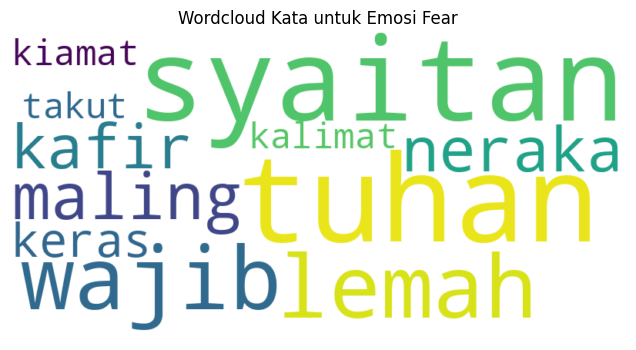

In [ ]:
for emo in ["fear"]:
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="white",
        # warna merah untuk emosi marah
        collocations=False
    ).generate_from_frequencies(wordcount_emosi[emo])

    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Wordcloud Kata untuk Emosi {emo.capitalize()}")
    plt.show()

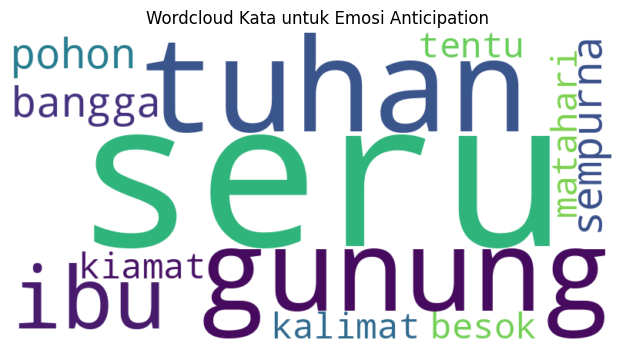

In [ ]:
for emo in ["anticipation"]:
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="white",
        # warna merah untuk emosi marah
        collocations=False
    ).generate_from_frequencies(wordcount_emosi[emo])

    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Wordcloud Kata untuk Emosi {emo.capitalize()}")
    plt.show()

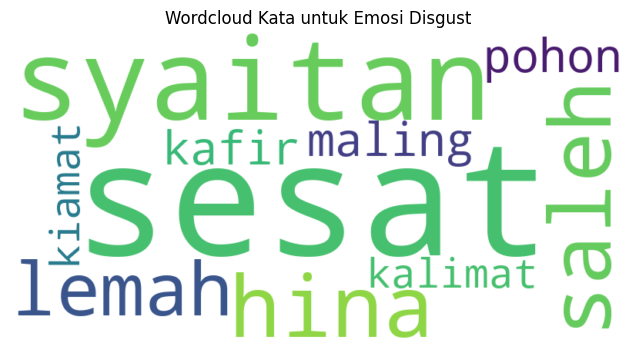

In [ ]:
for emo in ["disgust"]:
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="white",
        # warna merah untuk emosi marah
        collocations=False
    ).generate_from_frequencies(wordcount_emosi[emo])

    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Wordcloud Kata untuk Emosi {emo.capitalize()}")
    plt.show()

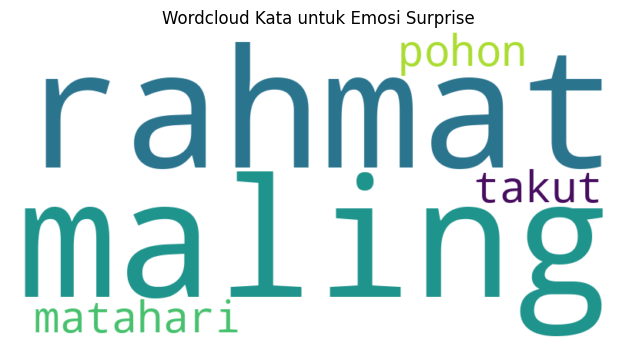

In [ ]:
for emo in ["surprise"]:
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="white",
        # warna merah untuk emosi marah
        collocations=False
    ).generate_from_frequencies(wordcount_emosi[emo])

    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Wordcloud Kata untuk Emosi {emo.capitalize()}")
    plt.show()

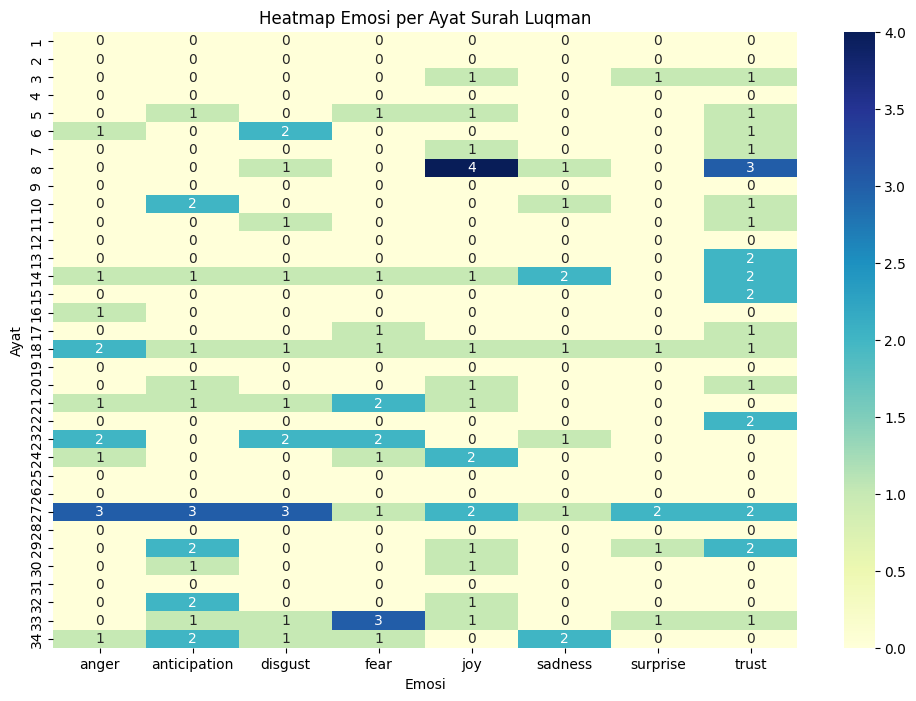

In [ ]:
# 8. Heatmap Emosi per Ayat
plt.figure(figsize=(12,8))
sns.heatmap(result_df.set_index("Ayat")[['anger','anticipation','disgust','fear','joy','sadness','surprise','trust']], annot=True, cmap="YlGnBu", cbar=True)
plt.title("Heatmap Emosi per Ayat Surah Luqman")
plt.xlabel("Emosi")
plt.ylabel("Ayat")
plt.show()